# Lorenzo Venieri _ Structural Descriptors

a) Numerical descriptors

Number of nodes \
Number of edges \
Minimum, maximum and average degree\
Average clustering coefficient (average of the clustering coefficients of each node)\
Assortativity\
Average path length (average distance between all pairs of nodes)\
Diameter (maximum distance between nodes in the network)

Use 4 decimal digits for the non-integer descriptors. Put the results in table form for all the networks in the A1-networks.zip file.

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os
import dataframe_image as dfi
%matplotlib inline

In [42]:
main_path='/Users/lorenzovenieri/Desktop/UNIVERSITÅ/COMPLEX NETWORKS/'

In [364]:
#store the networks in the model folder
#we store them as tuple: index0: name , index1: network
#All this networks are Multigraph (NetworkX stores every graph as a multigraph)
#for G in [net[1] for net in nets]:
   #print(type(G).__name__)
#We store them as graphs using nx.Graph(G)
    
model_nets=[]
model_path="A1-networks/model"
os.chdir(main_path)
os.chdir(model_path)
for file in os.listdir():
    model_nets.append(('{}'.format(file),(nx.Graph(nx.read_pajek(file)))))

In [365]:
#store the networks in the real folder
real_nets=[]
real_path="A1-networks/real"
os.chdir(main_path)
os.chdir(real_path)
for file in os.listdir():
    real_nets.append(('{}'.format(file),(nx.Graph(nx.read_pajek(file)))))

In [366]:
#store the networks in the toy folder
toy_nets=[]
toy_path="A1-networks/toy"
os.chdir(main_path)
os.chdir(toy_path)
for file in os.listdir():
    toy_nets.append(('{}'.format(file),(nx.Graph(nx.read_pajek(file)))))

In [367]:
#stored as tuple: index0: name , index1: network
nets=[*model_nets,*real_nets,*toy_nets]

In [368]:
#run this cell after storing the networks to go back to the main directory
os.chdir(main_path)
os.getcwd()

'/Users/lorenzovenieri/Desktop/UNIVERSITÅ/COMPLEX NETWORKS'

In [401]:
#The networks could be stored also with the following procedure that is maybe more elegant.

#nets=[]
#nets_folder_path="A1-networks/"
#with os.scandir(nets_folder_path) as folders_list:
#    for folder in folders_list:
#        if folder.is_dir():
#            networks=os.listdir(nets_folder_path+folder.name)
#            for net in networks:
#                if net.endswith(".net"):
#                    file=nets_folder_path+folder.name+'/'+net
#                    nets.append(('{}'.format(net),(nx.Graph(nx.read_pajek(file)))))

In [369]:
df = pd.DataFrame(columns=('Name', 'number of nodes', 'number of edges', 'minimum degree', 
                           'maximum degree', 'average degree', 
                           'average clustering coeff.', 'Assortativity',
                           'Average path length', 'diameter'))
for i,net in enumerate(nets):
    G=nets[i][1]
    degrees_val=dict(G.degree()).values()
    df.loc[i] = [nets[i][0],len(G.nodes()),len(G.edges()),min(degrees_val),
                 max(degrees_val),sum(degrees_val)/len(degrees_val),
                 nx.cluster.average_clustering(G),
                 nx.degree_assortativity_coefficient(G),
                 nx.average_shortest_path_length(G),nx.diameter(G)]

    

//anaconda3/lib/python3.7/site-packages/networkx/algorithms/assortativity/correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


In [370]:
df.round(4)

,Name,number of nodes,number of edges,minimum degree,maximum degree,average degree,average clustering coeff.,Assortativity,Average path length,diameter
0,SF_1000_g2.5.net,1000,1905,2,30,3.8100,0.0096,0.0200,4.6149,10
1,SF_1000_g2.7.net,1000,1668,2,24,3.3360,0.0067,-0.0020,5.4688,12
2,homorand_N1000_K6_0.net,1000,2994,5,6,5.9880,0.0038,0.1919,4.1913,6
3,homorand_N1000_K4_0.net,1000,2000,4,4,4.0000,0.0020,NaN,5.6400,9
4,ER1000k8.net,1000,3956,1,17,7.9120,0.0080,-0.0168,3.5698,6
5,SF_1000_g3.0.net,1000,1517,2,26,3.0340,0.0052,-0.0085,5.9651,13
6,ws2000.net,2000,6000,3,13,6.0000,0.0033,-0.0762,4.5111,7
7,BA1000.net,1000,3990,4,115,7.9800,0.0354,-0.0542,3.1833,5
8,256_4_4_4_13_18_p.net,256,2299,10,25,17.9609,0.5113,0.0007,2.6511,4
9,ER5000k8.net,5000,19980,4,17,7.9920,0.0014,-0.0555,4.3797,6


NaN values in the assortativity column means that all the nodes in the network have the same degree.

In [399]:
dfi.export(df.round(4),'a_numerical_descriptors.png')
df.to_csv('a_numerical_descriptors.csv')

b) Numerical descriptors of the nodes of the network real/airports_UW.net

Degree \
Strength\
Clustering coefficient\
Average path length (average distance to the rest of the nodes)\
Maximum path length (maximum distance to the rest of the nodes)\
Betweenness\
Eigenvector centrality\
PageRank

Use 8 decimal digits for the non-integer descriptors. Except for the strength, always consider the network as unweighted. Put the results for all the nodes in a CSV or Tab-separated file. Add to the document a table including the descriptors corresponding to the following airports:

PAR, LON, FRA, AMS, MOW, NYC, ATL, BCN, WAW, CHC, DJE, ADA, AGU, TBO, ZVA

In [372]:
A=nets[16][1] #airports network
nodes=list(nx.nodes(A))

In [373]:
def stats_path_length(graph,node):
    path_length_list=nx.shortest_path_length(graph,source=node).values()
    max_pl=max(path_length_list)
    average_pl=sum(path_length_list)/len(path_length_list)
    return max_pl,average_pl


In [374]:
A_df = pd.DataFrame(columns=('Node', 'Degree', 'Strenght', 'Clustering coefficient', 
                           'Average path length', 'Maximum path length', 
                             'Betweenness', 'Eigenvector centrality','PageRank'))
betweenness=nx.betweenness_centrality(A)
eig_centrality=nx.eigenvector_centrality(A)
pagerank=nx.pagerank(A)
for i,n in enumerate(nodes):
    A_df.loc[i] = [n,A.degree(n),A.degree(n,weight='weight'),nx.clustering(A,n),
                   stats_path_length(A,n)[1],stats_path_length(A,n)[0],
                   betweenness[n], eig_centrality[n], pagerank[n]]

In [375]:
airports_table_list=['PAR', 'LON', 'FRA', 'AMS', 'MOW', 'NYC', 'ATL', 'BCN', 
                     'WAW', 'CHC', 'DJE', 'ADA', 'AGU', 'TBO', 'ZVA']
A_table=A_df[A_df['Node'].isin(airports_table_list)]

In [376]:
dfi.export(A_table.round(8).reset_index(drop=True),'airports_descriptors.png')

In [397]:
A_df.to_csv('Airports.csv')

c) Plot the histograms of the degree distributions (PDF, probability distribution function) and the complementary cumulative degree distributions (CCDF, complementary cumulative distribution function) for the following networks:

model/ER5000k8.net\
model/SF_1000_g2.7.net\
model/ws1000.net\
real/airports_UW.net\
real/PGP.net

For each network, choose the appropriate histogram form, either linear (e.g. figure 10.3 of the book) or log-log histogram (e.g., figures 10.6 and 10.7 of the book). If both histograms are included, then specify explicitly which one is the appropriate one. The number of bins of the histograms must be between 10 and 30.

In [378]:
hist_list=['ER5000k8.net', 'SF_1000_g2.7.net', 'ws1000.net', 'airports_UW.net','PGP.net']
nets_hist=df[df['Name'].isin(hist_list)]
nets_hist

,Name,number of nodes,number of edges,minimum degree,maximum degree,average degree,average clustering coeff.,Assortativity,Average path length,diameter
1,SF_1000_g2.7.net,1000,1668,2,24,3.336000,0.006650,-0.001961,5.468827,12
9,ER5000k8.net,5000,19980,4,17,7.992000,0.001389,-0.055476,4.379741,6
13,ws1000.net,1000,3000,3,13,6.000000,0.004365,-0.099929,4.091303,6
16,airports_UW.net,3618,14142,1,250,7.817579,0.495749,0.046224,4.439595,17
17,PGP.net,10680,24316,1,205,4.553558,0.265945,0.238211,7.485540,24


In [379]:
#fuctions to plot cdf and ccdf taken from the tutorial

def plot_ccdf(data, ax):
    """
    Plot the complementary cumulative distribution function
    (1-CDF(x)) based on the data on the axes object.
    
    Note that this way of computing and plotting the ccdf is not
    the best approach for a discrete variable, where many
    observations can have exactly same value!
    """
    # Note that, here we use the convention for presenting an 
    # empirical 1-CDF (ccdf) as discussed above
    sorted_vals = np.sort(np.unique(data))
    ccdf = np.zeros(len(sorted_vals))
    n = float(len(data))
    for i, val in enumerate(sorted_vals):
        ccdf[i] = np.sum(data >= val)/n
    ax.plot(sorted_vals, ccdf, "-")
    # faster (approximative) way:
    # sorted_vals = np.sort(data) 
    # ccdf = np.linspace(1, 1./len(data), len(data))
    # ax.plot(sorted_vals, ccdf)
    
def plot_cdf(data, ax):
    """
    Plot CDF(x) on the axes object
    
    Note that this way of computing and plotting the CDF is not
    the best approach for a discrete variable, where many
    observations can have exactly same value!
    """
    sorted_vals = np.sort(np.unique(data))
    cdf = np.zeros(len(sorted_vals))
    n = float(len(data))
    for i, val in enumerate(sorted_vals):
        cdf[i] = np.sum(data <= val)/n
    ax.plot(sorted_vals, cdf, "-")

    # faster (approximative) way:
    # sorted_vals = np.sort(data)
    # now probs run from "0 to 1"
    # probs = np.linspace(1./len(data),1, len(data))
    # ax.plot(sorted_vals, probs, "-")

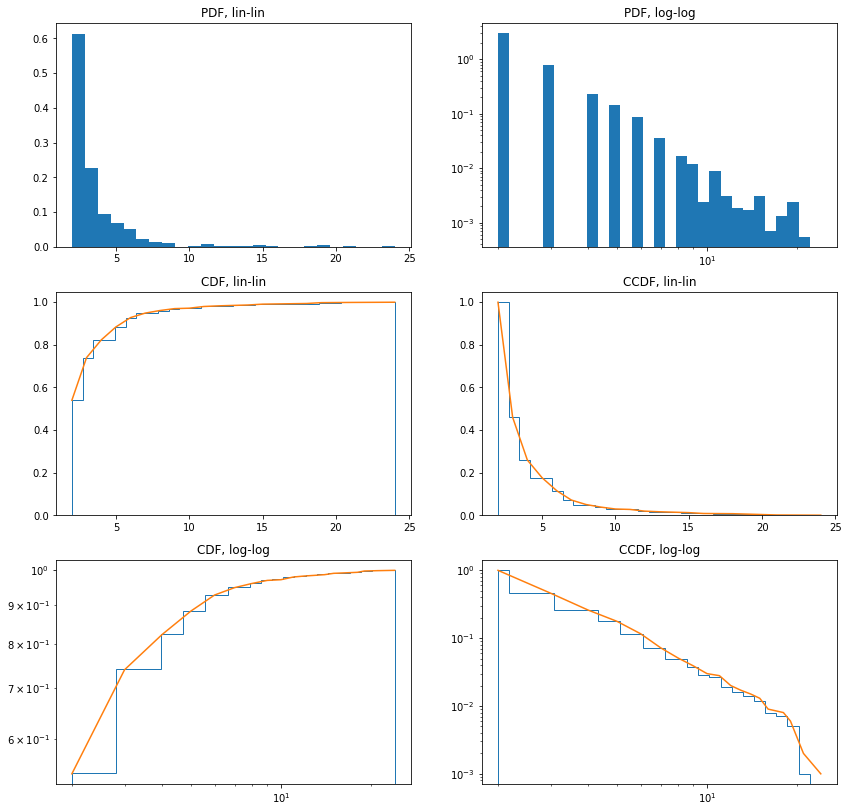

In [396]:
#SF_1000_g2.7.net
degrees=list(dict(nx.degree(nets[1][1])).values())
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
ax1.set_title('PDF, lin-lin')
ax2.set_title('PDF, log-log')
ax3.set_title('CDF, lin-lin')
ax4.set_title('CCDF, lin-lin')
ax5.set_title('CDF, log-log')
ax6.set_title('CCDF, log-log')
ax2.set_xscale('log')
ax5.set_xscale('log')
ax5.set_yscale('log')
ax6.set_xscale('log')
ax6.set_yscale('log')

#logarithmic binning
bins = np.logspace(np.log10(np.min(degrees)),np.log10(np.max(degrees)),num=30)

ax1.hist(degrees, bins=25, density=True, log=False);
ax2.hist(degrees, bins=bins, density=True, log=True);
ax3.hist(degrees, bins=30, density=True, log=False, cumulative=1, histtype='step');
ax4.hist(degrees, bins=30, density=True, log=False, cumulative=-1, histtype='step');
plot_cdf(np.array(list(degrees)),ax3)
plot_ccdf(np.array(list(degrees)),ax4)
ax5.hist(degrees, bins=bins, density=True, log=False, cumulative=1, histtype='step');
ax6.hist(degrees, bins=bins, density=True, log=False, cumulative=-1, histtype='step');
plot_cdf(np.array(list(degrees)),ax5)
plot_ccdf(np.array(list(degrees)),ax6)

I used the first network (SF_1000_g2.7.net) as an experiment to plot everything and to see that we can also plot the CDF and CCDF easily using the histogram function with the right parameters. \
This network has a power-law distribtion, we can see it from the CCDF in log-log scale, that is a straight line. So for the plots is indicated to use a log-log scale.

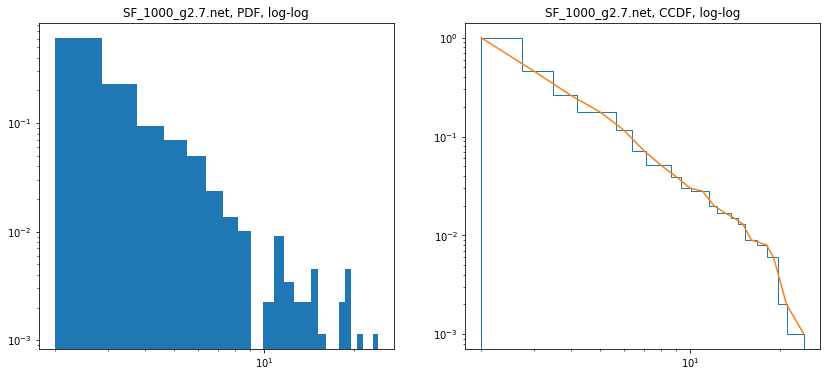

In [381]:
#SF_1000_g2.7.net
degrees=list(dict(nx.degree(nets[1][1])).values())
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('SF_1000_g2.7.net, PDF, log-log')
ax2.set_title('SF_1000_g2.7.net, CCDF, log-log')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.hist(degrees, bins=25, density=True, log=True);
ax2.hist(degrees, bins=30, density=True, log=False, cumulative=-1, histtype='step');
plot_ccdf(np.array(list(degrees)),ax2)

plt.savefig('SF_1000_g2.7.png')

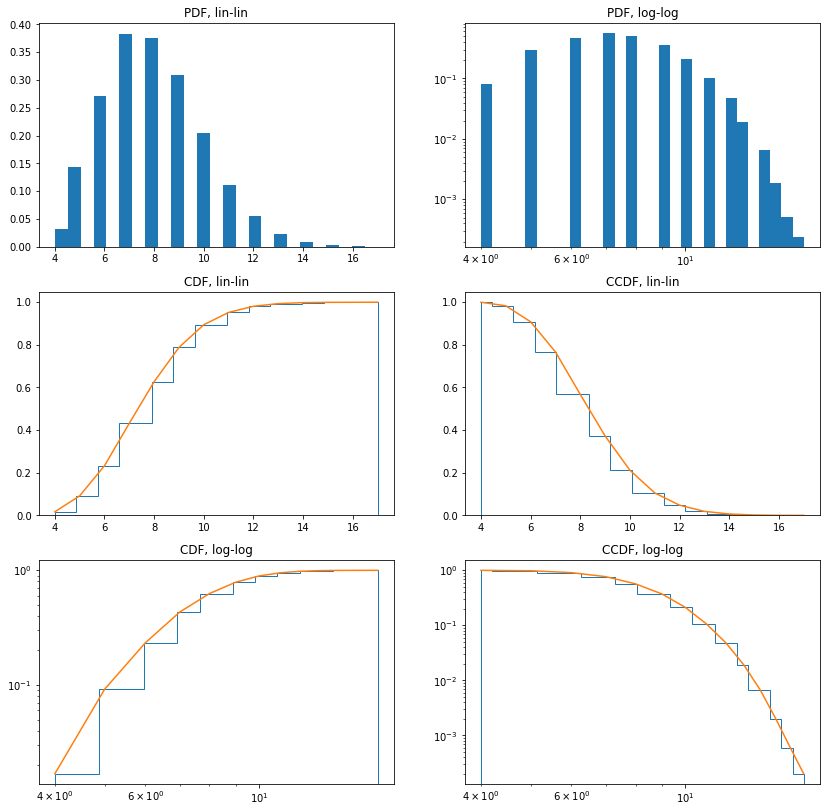

In [395]:
#ER5000k8.net
degrees=list(dict(nx.degree(nets[9][1])).values())
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
ax1.set_title('PDF, lin-lin')
ax2.set_title('PDF, log-log')
ax3.set_title('CDF, lin-lin')
ax4.set_title('CCDF, lin-lin')
ax5.set_title('CDF, log-log')
ax6.set_title('CCDF, log-log')
ax2.set_xscale('log')
ax5.set_xscale('log')
ax5.set_yscale('log')
ax6.set_xscale('log')
ax6.set_yscale('log')

#logarithmic binning
bins = np.logspace(np.log10(np.min(degrees)),np.log10(np.max(degrees)),num=30)

ax1.hist(degrees, bins=25, density=True, log=False);
ax2.hist(degrees, bins=bins, density=True, log=True);
ax3.hist(degrees, bins=30, density=True, log=False, cumulative=1, histtype='step');
ax4.hist(degrees, bins=30, density=True, log=False, cumulative=-1, histtype='step');
plot_cdf(np.array(list(degrees)),ax3)
plot_ccdf(np.array(list(degrees)),ax4)
ax5.hist(degrees, bins=bins, density=True, log=False, cumulative=1, histtype='step');
ax6.hist(degrees, bins=bins, density=True, log=False, cumulative=-1, histtype='step');
plot_cdf(np.array(list(degrees)),ax5)
plot_ccdf(np.array(list(degrees)),ax6)

The degrees of this network don't follow a power-law distribution. 
A lin-lin scale is ok since it makes possible to see almost all the bars of the degrees, with the only exception of the bar of degree=17 (we know from the table of numerical descriptor that this network has maximum degree=17), so I choose to represent the PDF with a lin-lin scale (also a lin-log scale would be ok). \
The same argument applies for the CCDF.

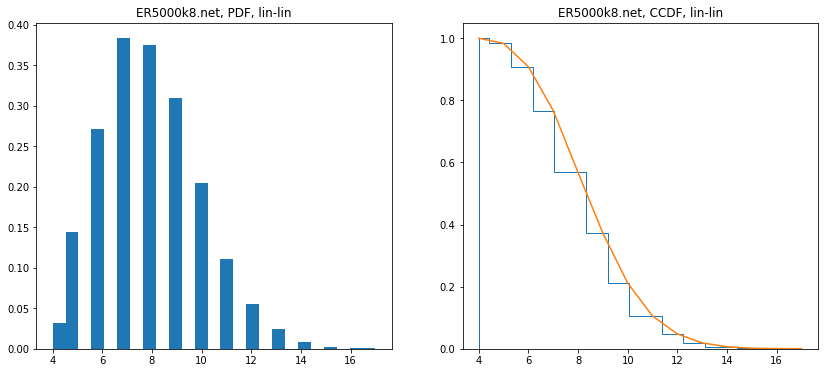

In [383]:
#ER5000k8.net
degrees=list(dict(nx.degree(nets[9][1])).values())
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('ER5000k8.net, PDF, lin-lin')
ax2.set_title('ER5000k8.net, CCDF, lin-lin')

ax1.hist(degrees, bins=25, density=True, log=False);
ax2.hist(degrees, bins=30, density=True, log=False, cumulative=-1, histtype='step');
plot_ccdf(np.array(list(degrees)),ax2)
plt.savefig('ER5000k8.png')

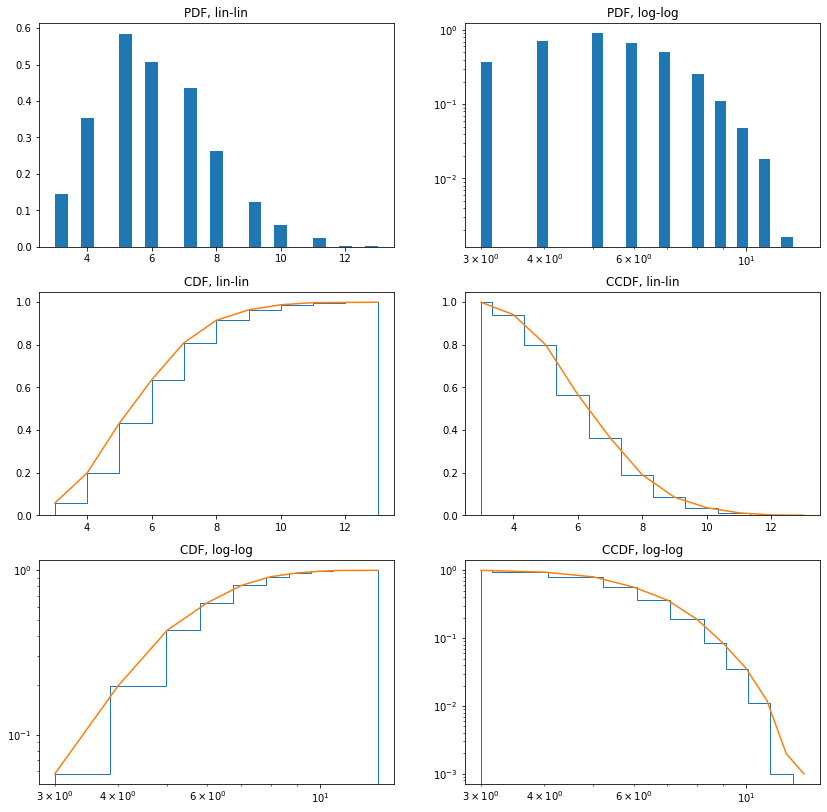

In [393]:
#ws1000.net
degrees=list(dict(nx.degree(nets[13][1])).values())
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
ax1.set_title('PDF, lin-lin')
ax2.set_title('PDF, log-log')
ax3.set_title('CDF, lin-lin')
ax4.set_title('CCDF, lin-lin')
ax5.set_title('CDF, log-log')
ax6.set_title('CCDF, log-log')
ax2.set_xscale('log')
ax5.set_xscale('log')
ax5.set_yscale('log')
ax6.set_xscale('log')
ax6.set_yscale('log')

#logarithmic binning
bins = np.logspace(np.log10(np.min(degrees)),np.log10(np.max(degrees)),num=30)

ax1.hist(degrees, bins=25, density=True, log=False);
ax2.hist(degrees, bins=bins, density=True, log=True);
ax3.hist(degrees, bins=30, density=True, log=False, cumulative=1, histtype='step');
ax4.hist(degrees, bins=30, density=True, log=False, cumulative=-1, histtype='step');
plot_cdf(np.array(list(degrees)),ax3)
plot_ccdf(np.array(list(degrees)),ax4)
ax5.hist(degrees, bins=bins, density=True, log=False, cumulative=1, histtype='step');
ax6.hist(degrees, bins=bins, density=True, log=False, cumulative=-1, histtype='step');
plot_cdf(np.array(list(degrees)),ax5)
plot_ccdf(np.array(list(degrees)),ax6)

The distribution is similar to the one of ER5000k8.net: it is not a power-law, we use a lin-lin scale.

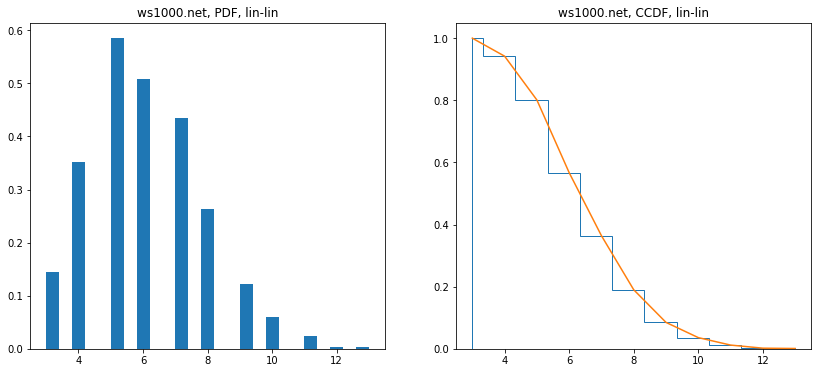

In [385]:
#ws1000.net
degrees=list(dict(nx.degree(nets[13][1])).values())
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('ws1000.net, PDF, lin-lin')
ax2.set_title('ws1000.net, CCDF, lin-lin')

ax1.hist(degrees, bins=25, density=True, log=False);
ax2.hist(degrees, bins=30, density=True, log=False, cumulative=-1, histtype='step');
plot_ccdf(np.array(list(degrees)),ax2)
plt.savefig('ws1000.png')

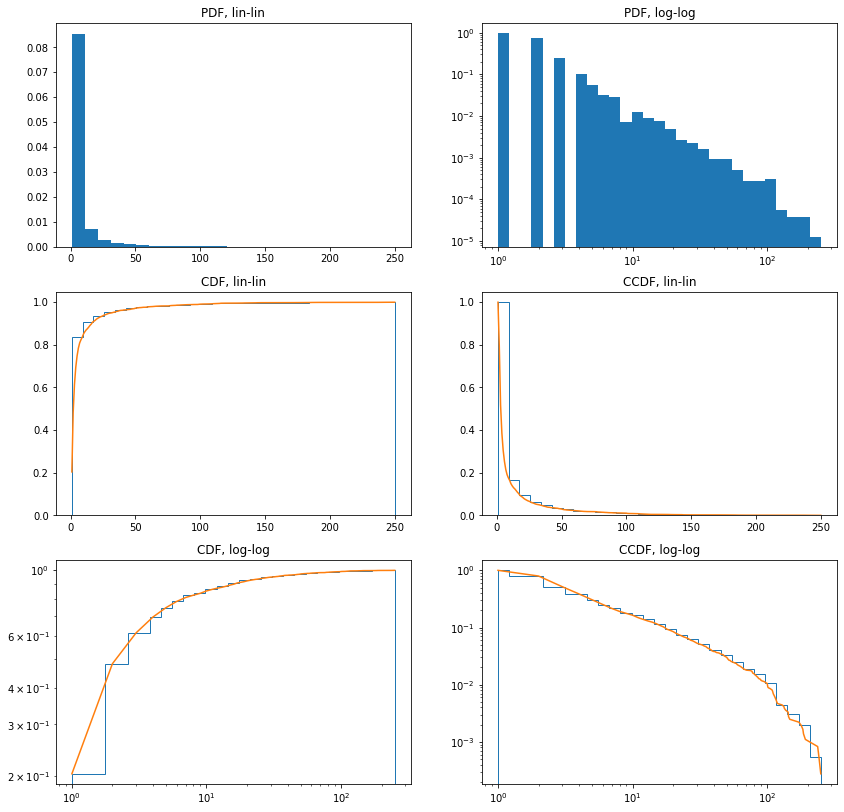

In [394]:
#airports_UW.net
degrees=list(dict(nx.degree(nets[16][1])).values())
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
ax1.set_title('PDF, lin-lin')
ax2.set_title('PDF, log-log')
ax3.set_title('CDF, lin-lin')
ax4.set_title('CCDF, lin-lin')
ax5.set_title('CDF, log-log')
ax6.set_title('CCDF, log-log')
ax2.set_xscale('log')
ax5.set_xscale('log')
ax5.set_yscale('log')
ax6.set_xscale('log')
ax6.set_yscale('log')

#logarithmic binning
bins = np.logspace(np.log10(np.min(degrees)),np.log10(np.max(degrees)),num=30)

ax1.hist(degrees, bins=25, density=True, log=False);
ax2.hist(degrees, bins=bins, density=True, log=True);
ax3.hist(degrees, bins=30, density=True, log=False, cumulative=1, histtype='step');
ax4.hist(degrees, bins=30, density=True, log=False, cumulative=-1, histtype='step');
plot_cdf(np.array(list(degrees)),ax3)
plot_ccdf(np.array(list(degrees)),ax4)
ax5.hist(degrees, bins=bins, density=True, log=False, cumulative=1, histtype='step');
ax6.hist(degrees, bins=bins, density=True, log=False, cumulative=-1, histtype='step');
plot_cdf(np.array(list(degrees)),ax5)
plot_ccdf(np.array(list(degrees)),ax6)

In airports_UW.net we have a power-law distribution, we use log-log scale for both PDF and CCDF.

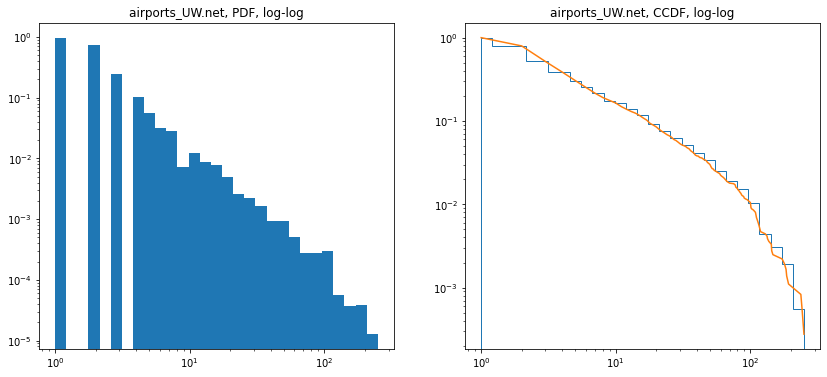

In [387]:
#airports_UW.net
degrees=list(dict(nx.degree(nets[16][1])).values())
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('airports_UW.net, PDF, log-log')
ax2.set_title('airports_UW.net, CCDF, log-log')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')

#I use logarithmic binning to obtain a better hist
bins = np.logspace(np.log10(np.min(degrees)),np.log10(np.max(degrees)),num=30)

ax1.hist(degrees, bins=bins, density=True, log=True);
ax2.hist(degrees, bins=bins, density=True, log=False, cumulative=-1, histtype='step');
plot_ccdf(np.array(list(degrees)),ax2)
plt.savefig('airports_UW.png')

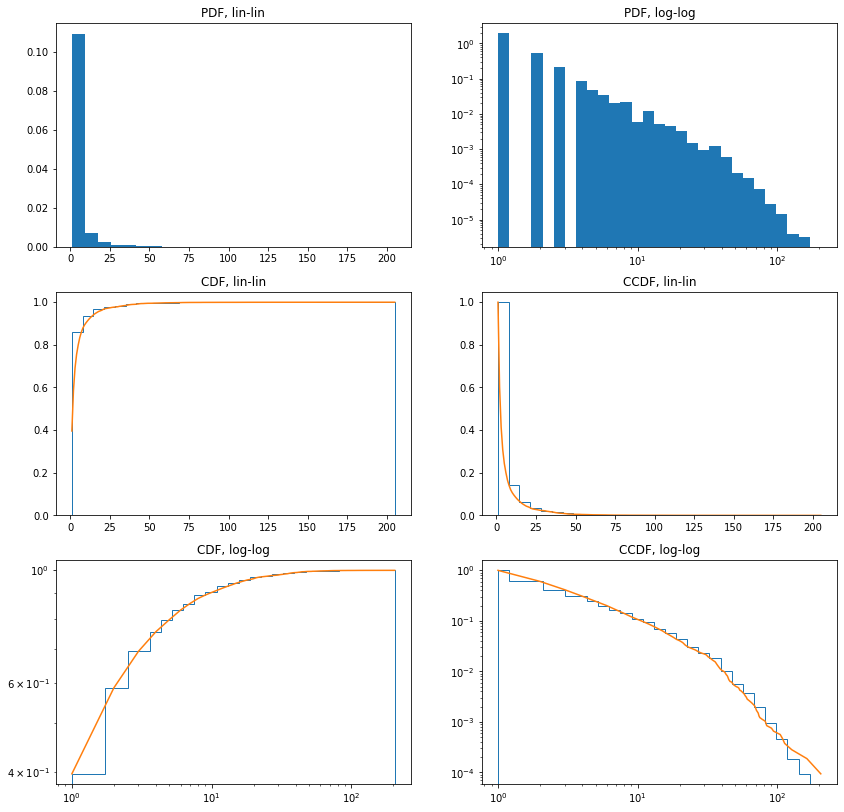

In [390]:
#PGP.net
degrees=list(dict(nx.degree(nets[17][1])).values())
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
ax1.set_title('PDF, lin-lin')
ax2.set_title('PDF, log-log')
ax3.set_title('CDF, lin-lin')
ax4.set_title('CCDF, lin-lin')
ax5.set_title('CDF, log-log')
ax6.set_title('CCDF, log-log')
ax2.set_xscale('log')
ax5.set_xscale('log')
ax5.set_yscale('log')
ax6.set_xscale('log')
ax6.set_yscale('log')

#logarithmic binning
bins = np.logspace(np.log10(np.min(degrees)),np.log10(np.max(degrees)),num=30)

ax1.hist(degrees, bins=25, density=True, log=False);
ax2.hist(degrees, bins=bins, density=True, log=True);
ax3.hist(degrees, bins=30, density=True, log=False, cumulative=1, histtype='step');
ax4.hist(degrees, bins=30, density=True, log=False, cumulative=-1, histtype='step');
plot_cdf(np.array(list(degrees)),ax3)
plot_ccdf(np.array(list(degrees)),ax4)
ax5.hist(degrees, bins=bins, density=True, log=False, cumulative=1, histtype='step');
ax6.hist(degrees, bins=bins, density=True, log=False, cumulative=-1, histtype='step');
plot_cdf(np.array(list(degrees)),ax5)
plot_ccdf(np.array(list(degrees)),ax6)

Also in PGP.net we have a power-law distribution, we use log-log scale for both PDF and CCDF.

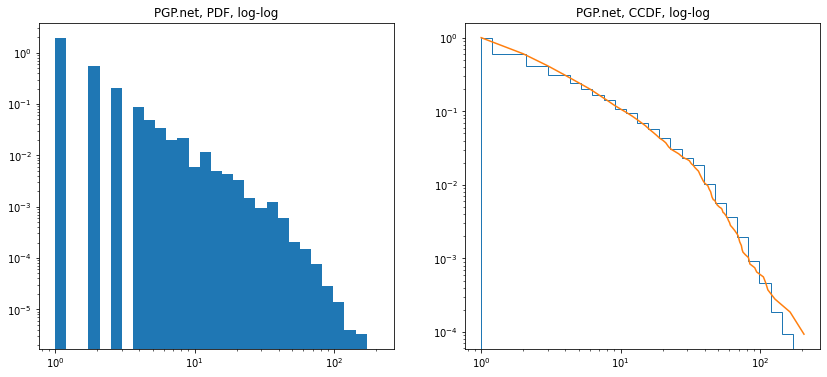

In [389]:
#PGP.net
degrees=list(dict(nx.degree(nets[17][1])).values())
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title('PGP.net, PDF, log-log')
ax2.set_title('PGP.net, CCDF, log-log')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')

#logarithmic binning
bins = np.logspace(np.log10(np.min(degrees)),np.log10(np.max(degrees)),num=30)

ax1.hist(degrees, bins=bins, density=True, log=True);
ax2.hist(degrees, bins=bins, density=True, log=False, cumulative=-1, histtype='step');
plot_ccdf(np.array(list(degrees)),ax2)
plt.savefig('PGP.png')